# Notebook de Conceptos Estadísticos Intermedios
Este notebook explica y demuestra conceptos estadísticos fundamentales

## 1. Importación de Librerías
Primero, importamos las librerías necesarias para el análisis numérico, estadísticas y visualización.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sns.set_theme(style="whitegrid")

## 2. Medidas de Tendencia Central y Dispersión
Crearemos un conjunto de datos de ejemplo para trabajar.

In [2]:
# Creamos un conjunto de datos
data = np.array([1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 8, 9, 10, 50])
print(f"Datos: {data}")

Datos: [ 1  2  2  3  4  5  5  5  6  7  8  9 10 50]


### Media (Mean)
La media es el promedio aritmético de un conjunto de valores. Es sensible a los valores atípicos (outliers).

In [3]:
mean_value = np.mean(data)
print(f"Media: {mean_value}")

Media: 8.357142857142858


### Mediana (Median)
La mediana es el valor que se encuentra en el centro de un conjunto de datos ordenado. Es una medida robusta frente a outliers.

In [4]:
median_value = np.median(data)
print(f"Mediana: {median_value}")
print("Nota: El valor 50 es un outlier. Observa cómo la media (8.35) es mucho más alta que la mediana (5.0), que representa mejor el 'centro' de la mayoría de los datos.")

Mediana: 5.0
Nota: El valor 50 es un outlier. Observa cómo la media (8.35) es mucho más alta que la mediana (5.0), que representa mejor el 'centro' de la mayoría de los datos.


### Moda (Mode)
La moda es el valor que aparece con mayor frecuencia en un conjunto de datos.

In [5]:
mode_value = stats.mode(data, keepdims=False)
print(f"Moda: {mode_value.mode} (aparece {mode_value.count} veces)")

Moda: 5 (aparece 3 veces)


### Varianza (Variance)
Mide la dispersión de los datos respecto a la media. Es el promedio de las diferencias al cuadrado entre cada valor y la media. Sus unidades están al cuadrado.

In [6]:
variance_value = np.var(data, ddof=1) # ddof=1 para la varianza muestral
print(f"Varianza: {variance_value}")

Varianza: 150.86263736263734


### Desviación Estándar (Standard Deviation)
Es la raíz cuadrada de la varianza. Mide la dispersión de los datos y está en las mismas unidades que los datos originales, lo que la hace más fácil de interpretar.

In [7]:
std_dev_value = np.std(data, ddof=1) # ddof=1 para la desviación estándar muestral
print(f"Desviación Estándar: {std_dev_value}")

Desviación Estándar: 12.282615249312231


## 3. Test de Normalidad
Estas pruebas estadísticas se usan para determinar si es probable que un conjunto de datos provenga de una distribución normal. La hipótesis nula (H0) es que los datos son normales.
Si el **p-value** es bajo (típicamente < 0.05), rechazamos la hipótesis nula y concluimos que los datos no siguen una distribución normal.

In [8]:
# Generamos datos que sí siguen una distribución normal
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=100)

# Y usamos nuestros datos anteriores, que no son normales
non_normal_data = data

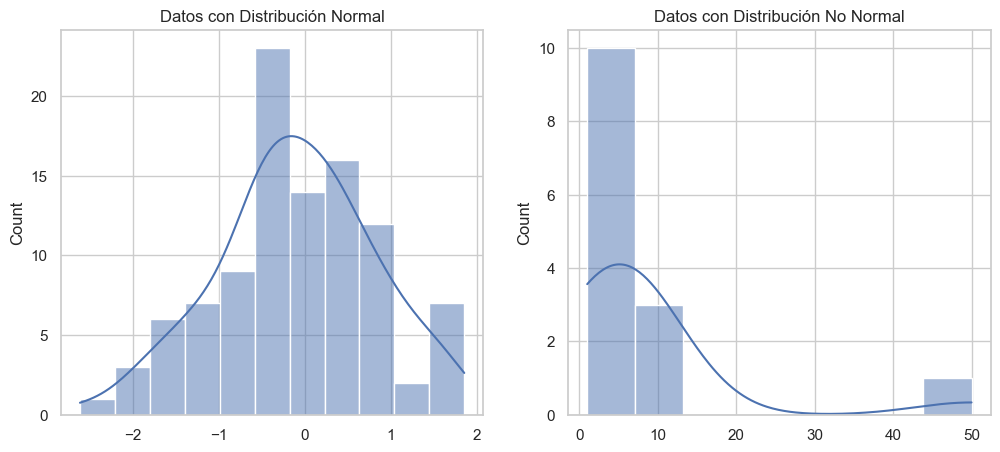

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(normal_data, kde=True)
plt.title('Datos con Distribución Normal')

plt.subplot(1, 2, 2)
sns.histplot(non_normal_data, kde=True, bins=8)
plt.title('Datos con Distribución No Normal')

plt.show()

### Test de Shapiro-Wilk
Es una de las pruebas de normalidad más potentes, especialmente para tamaños de muestra pequeños.

In [11]:
# Test para los datos normales
stat, p_value = stats.shapiro(normal_data)
print(f'Test de Shapiro-Wilk para datos normales:')
print(f'Estadístico={stat:.3f}, p-value={p_value:.3f}')
if p_value > 0.05:
    print('Conclusión: Los datos parecen seguir una distribución normal.')
else:
    print('Conclusión: Los datos no parecen seguir una distribución normal.')

# Test para los datos no normales
stat, p_value = stats.shapiro(non_normal_data)
print(f'Test de Shapiro-Wilk para datos no normales:')
print(f'Estadístico={stat:.3f}, p-value={p_value:.3f}')
if p_value > 0.05:
    print('Conclusión: Los datos parecen seguir una distribución normal.')
else:
    print('Conclusión: Los datos no parecen seguir una distribución normal.')

Test de Shapiro-Wilk para datos normales:
Estadístico=0.990, p-value=0.655
Conclusión: Los datos parecen seguir una distribución normal.
Test de Shapiro-Wilk para datos no normales:
Estadístico=0.504, p-value=0.000
Conclusión: Los datos no parecen seguir una distribución normal.


### Test de D'Agostino y Pearson (K^2)
Esta prueba evalúa la normalidad basándose en la asimetría (skewness) y la curtosis (kurtosis) de los datos.

In [12]:
# Test para los datos normales
stat, p_value = stats.normaltest(normal_data)
print(f'Test K^2 para datos normales:')
print(f'Estadístico={stat:.3f}, p-value={p_value:.3f}')
if p_value > 0.05:
    print('Conclusión: Los datos parecen seguir una distribución normal.')
else:
    print('Conclusión: Los datos no parecen seguir una distribución normal.')

# Test para los datos no normales
stat, p_value = stats.normaltest(non_normal_data)
print(f'Test K^2 para datos no normales:')
print(f'Estadístico={stat:.3f}, p-value={p_value:.3f}')
if p_value > 0.05:
    print('Conclusión: Los datos parecen seguir una distribución normal.')
else:
    print('Conclusión: Los datos no parecen seguir una distribución normal.')

Test K^2 para datos normales:
Estadístico=0.575, p-value=0.750
Conclusión: Los datos parecen seguir una distribución normal.
Test K^2 para datos no normales:
Estadístico=34.876, p-value=0.000
Conclusión: Los datos no parecen seguir una distribución normal.


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


## 4. Coeficientes de Correlación
La correlación mide la relación o asociación entre dos variables. El coeficiente varía entre -1 y 1.
- **1**: Correlación positiva perfecta.
- **-1**: Correlación negativa perfecta.
- **0**: Sin correlación.

In [13]:
np.random.seed(10)
x_linear = np.linspace(0, 10, 50)
y_linear = 2 * x_linear + 1 + np.random.normal(0, 2, 50) # Relación lineal con ruido

x_monotonic = np.linspace(0, 10, 50)
y_monotonic = np.log(x_monotonic + 1) + np.random.normal(0, 0.2, 50) # Relación monotónica no lineal

df_linear = pd.DataFrame({'x': x_linear, 'y': y_linear})
df_monotonic = pd.DataFrame({'x': x_monotonic, 'y': y_monotonic})

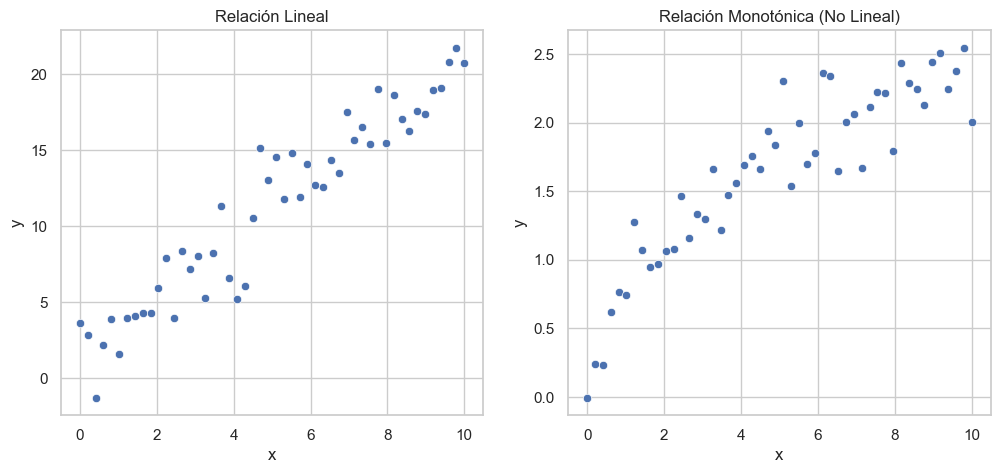

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_linear, x='x', y='y')
plt.title('Relación Lineal')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_monotonic, x='x', y='y')
plt.title('Relación Monotónica (No Lineal)')

plt.show()

### Correlación de Pearson
Mide la **relación lineal** entre dos variables. Requiere que los datos sean (aproximadamente) normales y no es robusto a outliers.

In [15]:
pearson_corr_linear, _ = stats.pearsonr(df_linear['x'], df_linear['y'])
print(f'Correlación de Pearson (datos lineales): {pearson_corr_linear:.4f}')

pearson_corr_monotonic, _ = stats.pearsonr(df_monotonic['x'], df_monotonic['y'])
print(f'Correlación de Pearson (datos monotónicos): {pearson_corr_monotonic:.4f}')
print('Nota: La correlación de Pearson es más baja para la relación no lineal.')

Correlación de Pearson (datos lineales): 0.9547
Correlación de Pearson (datos monotónicos): 0.9028
Nota: La correlación de Pearson es más baja para la relación no lineal.


### Correlación de Spearman
Mide la **relación monotónica** (si una variable aumenta, la otra también aumenta o disminuye, pero no necesariamente a un ritmo constante). Funciona con los rangos de los datos, por lo que no asume normalidad y es más robusta a outliers.

In [16]:
spearman_corr_linear, _ = stats.spearmanr(df_linear['x'], df_linear['y'])
print(f'Correlación de Spearman (datos lineales): {spearman_corr_linear:.4f}')

spearman_corr_monotonic, _ = stats.spearmanr(df_monotonic['x'], df_monotonic['y'])
print(f'Correlación de Spearman (datos monotónicos): {spearman_corr_monotonic:.4f}')
print('Nota: Spearman captura muy bien la fuerza de la relación monotónica, incluso si no es lineal.')

Correlación de Spearman (datos lineales): 0.9598
Correlación de Spearman (datos monotónicos): 0.9125
Nota: Spearman captura muy bien la fuerza de la relación monotónica, incluso si no es lineal.


### Correlación Tau de Kendall
Similar a Spearman, es una medida de correlación de rangos. Compara la concordancia entre pares de observaciones. A menudo se prefiere para conjuntos de datos más pequeños.

In [17]:
kendall_corr_linear, _ = stats.kendalltau(df_linear['x'], df_linear['y'])
print(f'Correlación de Kendall (datos lineales): {kendall_corr_linear:.4f}')

kendall_corr_monotonic, _ = stats.kendalltau(df_monotonic['x'], df_monotonic['y'])
print(f'Correlación de Kendall (datos monotónicos): {kendall_corr_monotonic:.4f}')
print('Los valores de Kendall suelen ser más bajos que los de Spearman, pero interpretan el mismo tipo de relación.')

Correlación de Kendall (datos lineales): 0.8269
Correlación de Kendall (datos monotónicos): 0.7714
Los valores de Kendall suelen ser más bajos que los de Spearman, pero interpretan el mismo tipo de relación.


## 5. Normalización
La normalización (específicamente la escala Min-Max) es una técnica de preprocesamiento que escala las características numéricas a un rango fijo, comúnmente [0, 1]. Es útil para algoritmos de Machine Learning que son sensibles a la escala de las características (como SVM o redes neuronales).
La fórmula es: `X_norm = (X - X_min) / (X_max - X_min)`

In [19]:
# Usamos nuestros datos originales con el outlier
original_data = data.reshape(-1, 1) # El escalador requiere un formato 2D

# Creamos e instanciamos el escalador
scaler = MinMaxScaler()

# Ajustamos el escalador y transformamos los datos
normalized_data = scaler.fit_transform(original_data)

print('Datos Originales:')
print(original_data.flatten())

print('Datos Normalizados (escala 0 a 1):')
print(normalized_data.flatten())

Datos Originales:
[ 1  2  2  3  4  5  5  5  6  7  8  9 10 50]
Datos Normalizados (escala 0 a 1):
[0.         0.02040816 0.02040816 0.04081633 0.06122449 0.08163265
 0.08163265 0.08163265 0.10204082 0.12244898 0.14285714 0.16326531
 0.18367347 1.        ]


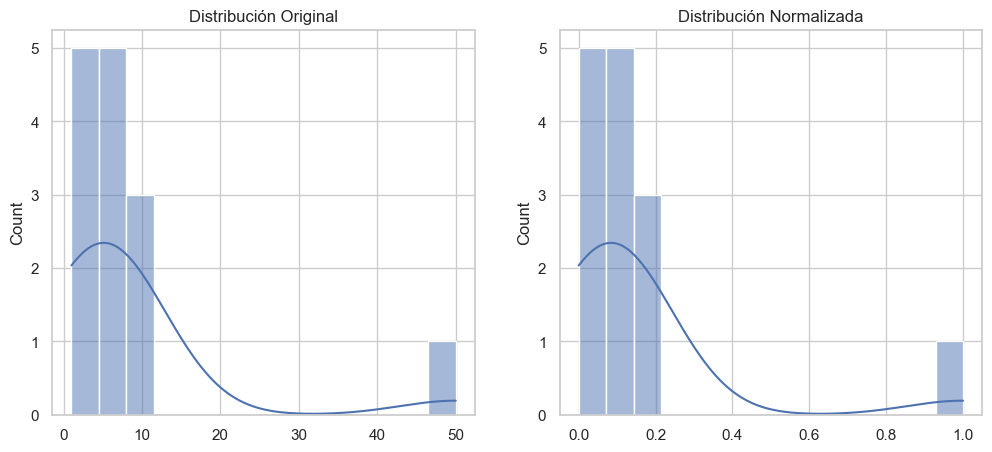

Observa que la forma de la distribución no cambia, solo la escala del eje X.


In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title('Distribución Original')

sns.histplot(normalized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title('Distribución Normalizada')

plt.show()
print('Observa que la forma de la distribución no cambia, solo la escala del eje X.')